In [55]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [56]:
%%bash
cd .. && make clean && make

In [57]:
config_name = 'constant'
conf = load_conf(config_name)

In [58]:
params_unif, data_unif_temp, data_unif_heat = run_with_params(
    config_name,
    [{
        'alpha': 1,
    }]
)[0]
params_nonunif, data_nonunif_temp, data_nonunif_heat = run_with_params(
    config_name,
    [{
        'alpha': 2,
    }]
)[0]

Running simulations... Done 1/1
Running simulations... Done 1/1


# Plots!

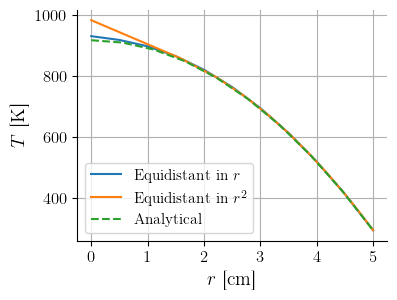

In [59]:
plt.plot(data_unif_temp[:,0]*100, data_unif_temp[:,1], label='Equidistant in $r$')
plt.plot(data_nonunif_temp[:,0]*100, data_nonunif_temp[:,1], label='Equidistant in $r^2$')
# TODO: solution analytique
x = np.linspace(0, conf['R'], 10)
y = conf['S0'] / (4 * conf['kappa0']) * (conf['R']**2 - x**2) + conf['TR']
plt.plot(x*100, y, '--', label='Analytical')

# for r in data_nonunif_temp[:,0]:
#     plt.axvline(r*100, color='red')
# for r in data_unif_temp[:,0]:
#     plt.axvline(r*100, color='blue')

plt.xlabel(r'$r$ [cm]')
plt.ylabel(r'$T$ [K]')
plt.legend()
plt.grid()
plt.savefig(export_path + 'temperature_constant.pdf')

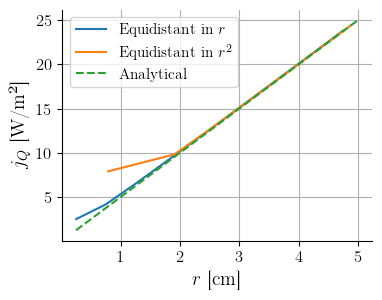

In [60]:
plt.plot(data_unif_heat[:,0]*100, data_unif_heat[:,1], label='Equidistant in $r$')
plt.plot(data_nonunif_heat[:,0]*100, data_nonunif_heat[:,1], label='Equidistant in $r^2$')
# TODO: solution analytique
x = np.linspace(data_unif_heat[0,0], conf['R'], 10)
y = conf['S0'] / 2 * x
plt.plot(x*100, y, '--', label='Analytical')

plt.xlabel(r'$r$ [cm]')
plt.ylabel(r'$j_Q$ [W/m²]')
plt.legend()
plt.grid()
plt.savefig(export_path + 'heat_constant.pdf')

## Balance de puissance globale

In [27]:
def s(r):
    return conf['S0'] * np.exp(-(r - conf['r0'])**2 / (conf['sigma']**2))

In [28]:
S0 = conf['S0']
r0 = conf['r0']
sigma = conf['sigma']
R = conf['R']

def dPtot(r):
    return 2*np.pi*r * S0*np.exp(-((r-r0)/sigma)**2)

def Ptot(r):
    return np.pi * S0 * r**2

# Ptot = sc.integrate.quad(dPtot, 0, R)[0]

In [33]:
gamma_Q = 2 * np.pi * data_unif_heat[-1,0] * data_unif_heat[-1,1]
print(
    gamma_Q, Ptot(data_unif_heat[-1,0]), Ptot(R),
    abs(Ptot(data_unif_heat[-1,0]) - gamma_Q),
    abs(Ptot(data_unif_heat[-1,0]) - gamma_Q)/Ptot(data_unif_heat[-1,0])
)

7.107853378746904 7.08821842466197 7.853981633974484 0.019634954084933653 0.002770083102492715


In [34]:
gamma_Q = 2 * np.pi * data_nonunif_heat[-1,0] * data_nonunif_heat[-1,1]
print(
    gamma_Q, Ptot(data_nonunif_heat[-1,0]), Ptot(R),
    abs(Ptot(data_nonunif_heat[-1,0]) - gamma_Q),
    abs(Ptot(data_nonunif_heat[-1,0]) - gamma_Q)/Ptot(data_nonunif_heat[-1,0])
)

7.461282552275737 7.456111875811403 7.853981633974484 0.005170676464334001 0.0006934816095112988
